In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_mo = pd.read_csv('data/monday.csv', parse_dates=True, sep=';', index_col=[0])
df_tu = pd.read_csv('data/tuesday.csv', parse_dates=True, sep=';', index_col=[0])
df_we = pd.read_csv('data/wednesday.csv', parse_dates=True, sep=';', index_col=[0])
df_th = pd.read_csv('data/thursday.csv', parse_dates=True, sep=';', index_col=[0])
df_fr = pd.read_csv('data/friday.csv', parse_dates=True, sep=';', index_col=[0])

In [3]:
df_mo['day']= df_mo.index.dayofweek
df_tu['day']= df_tu.index.dayofweek
df_we['day']= df_we.index.dayofweek
df_th['day']= df_th.index.dayofweek
df_fr['day']= df_fr.index.dayofweek

In [4]:
df_mo['customer_id'] = df_mo['day'].astype(str) + '_' + df_mo['customer_no'].astype(str)
df_tu['customer_id'] = df_tu['day'].astype(str) + '_' + df_tu['customer_no'].astype(str)
df_we['customer_id'] = df_we['day'].astype(str) + '_' + df_we['customer_no'].astype(str)
df_th['customer_id'] = df_th['day'].astype(str) + '_' + df_th['customer_no'].astype(str)
df_fr['customer_id'] = df_fr['day'].astype(str) + '_' + df_fr['customer_no'].astype(str)

In [5]:
df_all = pd.concat([df_mo, df_tu, df_we, df_th, df_fr])
print(df_all.head(3))
print(df_all.tail(3))

                     customer_no location  day customer_id
timestamp                                                 
2019-09-02 07:03:00            1    dairy    0         0_1
2019-09-02 07:03:00            2    dairy    0         0_2
2019-09-02 07:04:00            3    dairy    0         0_3
                     customer_no  location  day customer_id
timestamp                                                  
2019-09-06 21:50:00         1508  checkout    4      4_1508
2019-09-06 21:50:00         1509    drinks    4      4_1509
2019-09-06 21:50:00         1510    spices    4      4_1510


In [6]:
df_all['hour'] =df_all.index.hour

## Calculate the total number of customers in each section

In [7]:
df_all['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [8]:
df_all.groupby(['location'])['customer_id'].count()

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='location', ylabel='count'>

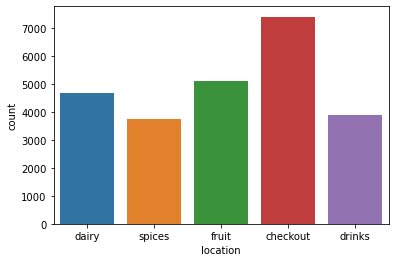

In [9]:
sns.countplot(x=df_all.location)

## Calculate the total number of customers in each section over time

In [10]:
cust_persec_ot = df_all.groupby(['location', 'hour'])['customer_id'].count()
cust_persec_ot = pd.DataFrame(cust_persec_ot)
cust_persec_ot = cust_persec_ot.reset_index('hour')
cust_persec_ot.head(16)

,hour,customer_id
location,,
checkout,7,454
checkout,8,677
checkout,9,455
checkout,10,427
checkout,11,342
checkout,12,384
checkout,13,514
checkout,14,496
checkout,15,412


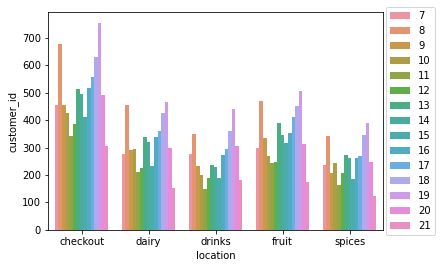

In [11]:
sns.barplot(data=cust_persec_ot, x=cust_persec_ot.index, y='customer_id', hue='hour')
plt.legend(bbox_to_anchor=(1.17, 0.5), loc=5)

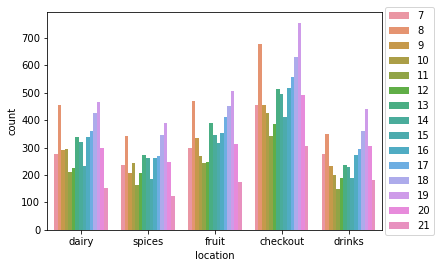

In [12]:
sns.countplot(x=df_all.location, hue=df_all.hour)
plt.legend(bbox_to_anchor=(1.17, 0.5), loc=5, )

## Display the number of customers at checkout over time

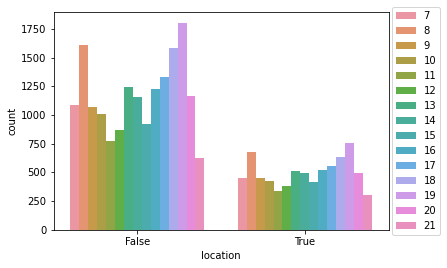

In [13]:
sns.countplot(x=df_all['location']=='checkout', hue=df_all.hour)
plt.legend(bbox_to_anchor=(1.17, 0.5), loc=5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
#sns.countplot(data=df_all, x='location', hue='day')
#plt.legend(bbox_to_anchor=(1.3, 0.5), loc=5)

## Calculate the time each customer spent in the market


In [15]:
df_all.head(3)

,customer_no,location,day,customer_id,hour
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,0,0_1,7
2019-09-02 07:03:00,2,dairy,0,0_2,7
2019-09-02 07:04:00,3,dairy,0,0_3,7


In [16]:
x = df_all.groupby(['customer_id', 'hour'])['location'].count().reset_index('hour')
#x = x.reset_index
#x = pd.DataFrame(x)
#x.sort_values(by=['hour'], ascending=True)
x
#df_all.shape

,hour,location
customer_id,,
0_1,7,2
0_10,7,2
0_100,7,1
0_100,8,1
0_1000,17,3
...,...,...
4_995,17,2
4_996,17,3
4_997,17,3


## Calculate the total number of customers in the supermarket over time.

In [17]:
cust_ot = df_all.groupby(['hour'])['customer_id'].count()
cust_ot = pd.DataFrame(cust_ot)
#cust_ot = cust_persec_ot.reset_index('hour')
cust_ot.head(15)

,customer_id
hour,
7,1544
8,2290
9,1520
10,1431
11,1111
12,1252
13,1754
14,1650
15,1335


In [18]:
## plot the distribution of customers

In [19]:
df_all_n = df_all.sort_values(by=['day','customer_id'])
#df_all_n1 = df_all.sort_values(by=['day','customer_id'])
df_all_n1 = df_all_n.reset_index()
df_all_n1.head(10)

,timestamp,customer_no,location,day,customer_id,hour
0,2019-09-02 07:03:00,1,dairy,0,0_1,7
1,2019-09-02 07:05:00,1,checkout,0,0_1,7
2,2019-09-02 07:06:00,10,fruit,0,0_10,7
3,2019-09-02 07:08:00,10,checkout,0,0_10,7
4,2019-09-02 07:56:00,100,drinks,0,0_100,7
5,2019-09-02 08:03:00,100,checkout,0,0_100,8
6,2019-09-02 17:44:00,1000,dairy,0,0_1000,17
7,2019-09-02 17:50:00,1000,drinks,0,0_1000,17
8,2019-09-02 17:51:00,1000,checkout,0,0_1000,17
9,2019-09-02 17:45:00,1001,fruit,0,0_1001,17


In [20]:
# create new index replacing the timestamp index
#index = pd.Series(range(0,len(df_all_n)))
#df_all_n.set_index(index, inplace=True)
#df_all_n.head(3)

In [21]:
df_all_n1['n_cust'] = df_all_n1.customer_no.shift()
df_all_n1.head(3)

,timestamp,customer_no,location,day,customer_id,hour,n_cust
0,2019-09-02 07:03:00,1,dairy,0,0_1,7,NaN
1,2019-09-02 07:05:00,1,checkout,0,0_1,7,1.0
2,2019-09-02 07:06:00,10,fruit,0,0_10,7,1.0


In [22]:
df_all_n1['purch'] = ['following' if df_all_n1.customer_no[i]==df_all_n1.n_cust[i] else 'first_visit' for i in df_all_n1.index]

In [23]:
df_all_n1.head(3)

,timestamp,customer_no,location,day,customer_id,hour,n_cust,purch
0,2019-09-02 07:03:00,1,dairy,0,0_1,7,NaN,first_visit
1,2019-09-02 07:05:00,1,checkout,0,0_1,7,1.0,following
2,2019-09-02 07:06:00,10,fruit,0,0_10,7,1.0,first_visit


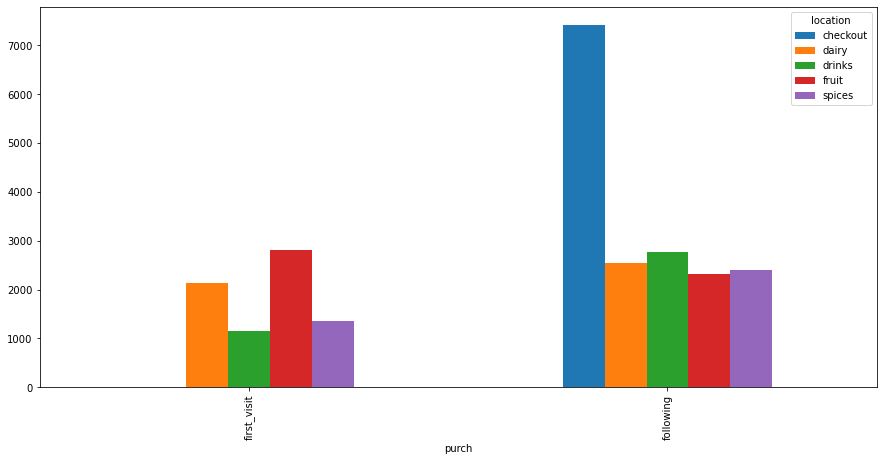

In [24]:
df_all_n1.groupby(['location', 'purch'])['location'].count()\
.unstack(0).plot(kind='bar', stacked= False, figsize=(15,7));

## Revenue estimate

In [25]:
rpm_dict = {'fruit':4, 'spices':3, 'dairy':5, 'drinks':6}
df_all_n1['rpm'] = df_all_n1['location'].map(rpm_dict)
df_all_n1.head(3)

,timestamp,customer_no,location,day,customer_id,hour,n_cust,purch,rpm
0,2019-09-02 07:03:00,1,dairy,0,0_1,7,NaN,first_visit,5.0
1,2019-09-02 07:05:00,1,checkout,0,0_1,7,1.0,following,NaN
2,2019-09-02 07:06:00,10,fruit,0,0_10,7,1.0,first_visit,4.0


In [26]:
df_all_n1['time_after'] = df_all_n1.timestamp.shift(-1)
df_all_n1.head(3)

,timestamp,customer_no,location,day,customer_id,hour,n_cust,purch,rpm,time_after
0,2019-09-02 07:03:00,1,dairy,0,0_1,7,NaN,first_visit,5.0,2019-09-02 07:05:00
1,2019-09-02 07:05:00,1,checkout,0,0_1,7,1.0,following,NaN,2019-09-02 07:06:00
2,2019-09-02 07:06:00,10,fruit,0,0_10,7,1.0,first_visit,4.0,2019-09-02 07:08:00


In [27]:
df_all_n1.tail(3)

,timestamp,customer_no,location,day,customer_id,hour,n_cust,purch,rpm,time_after
24874,2019-09-06 17:24:00,999,drinks,4,4_999,17,999.0,following,6.0,2019-09-06 17:25:00
24875,2019-09-06 17:25:00,999,fruit,4,4_999,17,999.0,following,4.0,2019-09-06 17:27:00
24876,2019-09-06 17:27:00,999,checkout,4,4_999,17,999.0,following,NaN,NaT


In [28]:
df_all_n1["rev"] = (df_all_n1.time_after.dt.minute-df_all_n1.timestamp.dt.minute)
df_all_n1.head(3)

,timestamp,customer_no,location,day,customer_id,hour,n_cust,purch,rpm,time_after,rev
0,2019-09-02 07:03:00,1,dairy,0,0_1,7,NaN,first_visit,5.0,2019-09-02 07:05:00,2.0
1,2019-09-02 07:05:00,1,checkout,0,0_1,7,1.0,following,NaN,2019-09-02 07:06:00,1.0
2,2019-09-02 07:06:00,10,fruit,0,0_10,7,1.0,first_visit,4.0,2019-09-02 07:08:00,2.0


In [29]:
print((df_all_n1['rev']==0).sum())
print((df_all_n1['rev']>0).sum())
df_all_n1.shape

349
18166


(24877, 11)

In [30]:
cust_rev = df_all_n1[(df_all_n1.rev > 0) & (df_all_n1.location != "checkout")]
cust_rev.head()

,timestamp,customer_no,location,day,customer_id,hour,n_cust,purch,rpm,time_after,rev
0,2019-09-02 07:03:00,1,dairy,0,0_1,7,NaN,first_visit,5.0,2019-09-02 07:05:00,2.0
2,2019-09-02 07:06:00,10,fruit,0,0_10,7,1.0,first_visit,4.0,2019-09-02 07:08:00,2.0
6,2019-09-02 17:44:00,1000,dairy,0,0_1000,17,100.0,first_visit,5.0,2019-09-02 17:50:00,6.0
7,2019-09-02 17:50:00,1000,drinks,0,0_1000,17,1000.0,following,6.0,2019-09-02 17:51:00,1.0
9,2019-09-02 17:45:00,1001,fruit,0,0_1001,17,1000.0,first_visit,4.0,2019-09-02 17:46:00,1.0


In [31]:
#
cust_rev
(cust_rev.groupby([cust_rev.day, cust_rev.timestamp.dt.hour])["rev"].sum())/(cust_rev.groupby([cust_rev.day, cust_rev.timestamp.dt.hour])["customer_no"].nunique())


day  timestamp
0    7            5.673469
     8            5.938053
     9            6.325843
     10           5.965517
     11           5.561404
                    ...   
4    17           5.770492
     18           6.716216
     19           5.720588
     20           5.979167
     21           5.173077
Length: 75, dtype: float64

In [32]:
cust_rev["rev"] = cust_rev.rev * cust_rev.rpm
cust_rev

<ipython-input-32-d47744df4568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_rev["rev"] = cust_rev.rev * cust_rev.rpm


,timestamp,customer_no,location,day,customer_id,hour,n_cust,purch,rpm,time_after,rev
0,2019-09-02 07:03:00,1,dairy,0,0_1,7,NaN,first_visit,5.0,2019-09-02 07:05:00,10.0
2,2019-09-02 07:06:00,10,fruit,0,0_10,7,1.0,first_visit,4.0,2019-09-02 07:08:00,8.0
6,2019-09-02 17:44:00,1000,dairy,0,0_1000,17,100.0,first_visit,5.0,2019-09-02 17:50:00,30.0
7,2019-09-02 17:50:00,1000,drinks,0,0_1000,17,1000.0,following,6.0,2019-09-02 17:51:00,6.0
9,2019-09-02 17:45:00,1001,fruit,0,0_1001,17,1000.0,first_visit,4.0,2019-09-02 17:46:00,4.0
...,...,...,...,...,...,...,...,...,...,...,...
24871,2019-09-06 17:18:00,999,fruit,4,4_999,17,998.0,first_visit,4.0,2019-09-06 17:20:00,8.0
24872,2019-09-06 17:20:00,999,drinks,4,4_999,17,999.0,following,6.0,2019-09-06 17:21:00,6.0
24873,2019-09-06 17:21:00,999,fruit,4,4_999,17,999.0,following,4.0,2019-09-06 17:24:00,12.0
24874,2019-09-06 17:24:00,999,drinks,4,4_999,17,999.0,following,6.0,2019-09-06 17:25:00,6.0


In [34]:
cust_rev_clr = cust_rev.groupby(['day']).agg({'customer_no':'nunique', 'rev': 'sum'}).rename(columns={'customer_no':'nr_of_customers', 'rev': 'total_revenue'})
cust_rev_clr['revenue_per_cust'] = cust_rev_clr.total_revenue/cust_rev_clr.nr_of_customers

In [35]:
cust_rev_clr

,nr_of_customers,total_revenue,revenue_per_cust
day,,,
0,1418,40056.0,28.248237
1,1394,37795.0,27.112626
2,1507,40070.0,26.589250
3,1498,40643.0,27.131509
4,1478,41448.0,28.043302


In [36]:
print("The average revenue per customer is {} Euro.".format(int(cust_rev_clr.revenue_per_cust.mean())))

The average revenue per customer is 27 Euro.


## which is the most profitable section?

In [44]:
cust_rev_sec = cust_rev.groupby(['day','location']).agg({'rev': 'sum', 'customer_no':'nunique'}).rename(columns={'rev': 'total_revenue', 'customer_no':'nr_of_customers'})
cust_rev_sec['revenue_per_cust'] = cust_rev_sec.total_revenue/cust_rev_sec.nr_of_customers

In [45]:
cust_rev_sec

total_revenue  nr_of_customers  revenue_per_cust
day location                                                  
0   dairy           15580.0              694         22.449568
    drinks          11436.0              642         17.813084
    fruit            9476.0              796         11.904523
    spices           3564.0              570          6.252632
1   dairy           15735.0              721         21.823856
    drinks           9738.0              565         17.235398
    fruit            8944.0              793         11.278689
    spices           3378.0              537          6.290503
2   dairy           16040.0              762         21.049869
    drinks          11076.0              634         17.470032
    fruit            9396.0              859         10.938300
    spices           3558.0              553          6.433996
3   dairy           16435.0              738         22.269648
    drinks          10266.0              607         16.912685
    fruit           10096.0              846         11.933806
    spices           3846.0              596          6.453020
4   dairy           15755.0              716         22.004190
    drinks          12012.0              664         18.090361
    fruit            9904.0              849         11.665489
    spices           3777.0              620          6.091935

In [56]:
cust_rev_sec['rel_rev'] = cust_rev_sec.total_revenue/cust_rev.groupby('day').customer_no.nunique()


day
0    1418
1    1394
2    1507
3    1498
4    1478
Name: customer_no, dtype: int64

In [48]:
cust_rev_sec

total_revenue  nr_of_customers  revenue_per_cust    rel_rev
day location                                                             
0   dairy           15580.0              694         22.449568  10.987306
    drinks          11436.0              642         17.813084   8.064880
    fruit            9476.0              796         11.904523   6.682652
    spices           3564.0              570          6.252632   2.513399
1   dairy           15735.0              721         21.823856  11.287661
    drinks           9738.0              565         17.235398   6.985653
    fruit            8944.0              793         11.278689   6.416069
    spices           3378.0              537          6.290503   2.423242
2   dairy           16040.0              762         21.049869  10.643663
    drinks          11076.0              634         17.470032   7.349701
    fruit            9396.0              859         10.938300   6.234904
    spices           3558.0              553          6.433996   2.360982
3   dairy           16435.0              738         22.269648  10.971295
    drinks          10266.0              607         16.912685   6.853138
    fruit           10096.0              846         11.933806   6.739653
    spices           3846.0              596          6.453020   2.567423
4   dairy           15755.0              716         22.004190  10.659675
    drinks          12012.0              664         18.090361   8.127199
    fruit            9904.0              849         11.665489   6.700947
    spices           3777.0              620          6.091935   2.555480

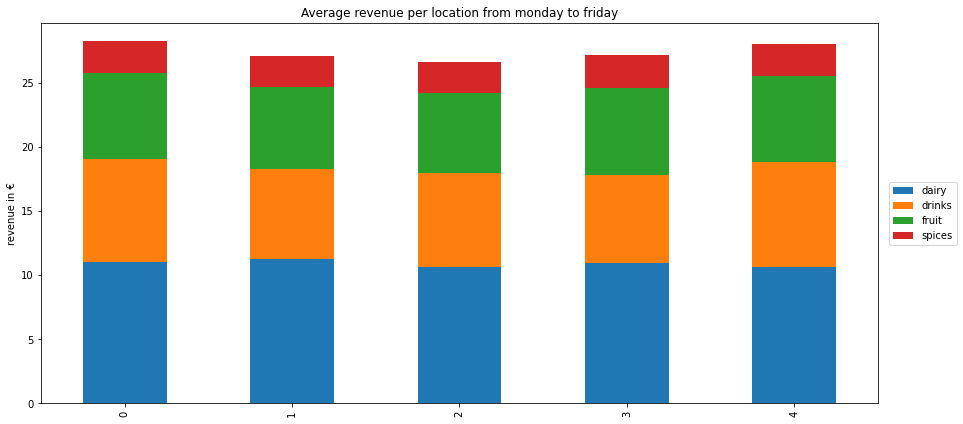

In [61]:
cust_rev_sec.unstack(1).rel_rev.plot(kind= "bar", stacked= True, figsize= (15,7))
plt.title('Average revenue per location from monday to friday')
plt.xlabel('')
plt.ylabel('revenue in €')
plt.legend(bbox_to_anchor=(1.1, 0.5), loc=5)

## Simulate a single customer

In [62]:
state_list = ["fruit", "spices", "drinks", "dairy", "checkout"]

In [64]:
c_df = df_all_n1[["customer_no", "timestamp", "location", "day"]]
c_df

,customer_no,timestamp,location,day
0,1,2019-09-02 07:03:00,dairy,0
1,1,2019-09-02 07:05:00,checkout,0
2,10,2019-09-02 07:06:00,fruit,0
3,10,2019-09-02 07:08:00,checkout,0
4,100,2019-09-02 07:56:00,drinks,0
...,...,...,...,...
24872,999,2019-09-06 17:20:00,drinks,4
24873,999,2019-09-06 17:21:00,fruit,4
24874,999,2019-09-06 17:24:00,drinks,4
24875,999,2019-09-06 17:25:00,fruit,4


## Resample timestamp into one-minute intervals and drop everything after checkout

In [72]:
c_df.set_index("timestamp", inplace = True)

In [73]:
c_resample = c_df.groupby(["day", "customer_no"])[["location"]].resample("1T").bfill()


In [75]:
c_resample["loc_after"] = c_resample.location.shift(-1)


In [76]:
c_resample.head()

location loc_after
day customer_no timestamp                              
0   1           2019-09-02 07:03:00     dairy  checkout
                2019-09-02 07:04:00  checkout  checkout
                2019-09-02 07:05:00  checkout     dairy
    2           2019-09-02 07:03:00     dairy  checkout
                2019-09-02 07:04:00  checkout  checkout